In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)
library(ggplot2)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_data <- read_csv("https://raw.githubusercontent.com/vnguyen243/dsci_100_project/refs/heads/main/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/vnguyen243/dsci_100_project/refs/heads/main/sessions.csv")
players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


# Data description
Dataset "players_csv" records information about players:
- 196 observations
- 7 variables
- Variables ‘experience’ and ‘gender’ are imported as character data types but should be converted into factor data types as they’re actually categorical with a limited number of values
- Age has 2 missing values.
- There’s a potential issue of players reporting false information like age, like individuals who reported their age to be 99 or 0

| Variable name | Description | Type   |
| :-----------: | :------     | :----: |
| experience    | player's experience level (Pro, Veteran, Amateur, Regular, Beginner) | character |
| subscribe     | whether the player subscribed to the newsletter | logical   |
| hashedEmail   | hashed version of player's email used to play the game | character |
| played_hours  | total time played, in hours                            | numerical |
| name          | player's name | character |
| gender        | player's gender (Male, Female, Agender, Non-binary, Two-Spirited, Other, Prefer not to say) | character |
| played_hours  | age of player                                          | numerical |

Dataset "sessions_csv" records information about sessions by each player:
- 1535 observations
- 5 variables
- Cells under 'start_time' and 'end_time' contain multiple values and should be each split into two cells (one containing the date and one containing the time)
- Variable names ‘original_start_time’ and ‘original_end_time’ should include 'e+12' so the cells can contain a single value

| Variable name       | Description | Type   |
| :-----------:       | :------     | :----: |
| hashedEmail         | hashed version of player's email used to play the game | character |
| start_time          | session start time                                     | character |
| end_time            | session end time                                       | character |
| original_start_time | session start time in UNIX timestamp format            | numerical |
| original_end_time   | session start time in UNIX timestamp format            | numerical |

# Question
To find the “kinds” of players (Q2), only the players dataset is relevant and the sessions dataset isn’t really helpful.

Question based on Q2: Can the experience and age of players (predictors) accurately predict their total play time (response variable) using multivariate KNN and multivariate linear regression?

# Exploratory Data Analysis and Visualization

In [3]:
players_tidy <- players_data |>
filter(Age != "NA") |> # since 2 missing values of age variable are insignificant compared to 196 values in total, we delete them to make wrangling and visualizing steps easier
mutate(experience = factor(experience), gender = factor(gender)) # convert data type into category

players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

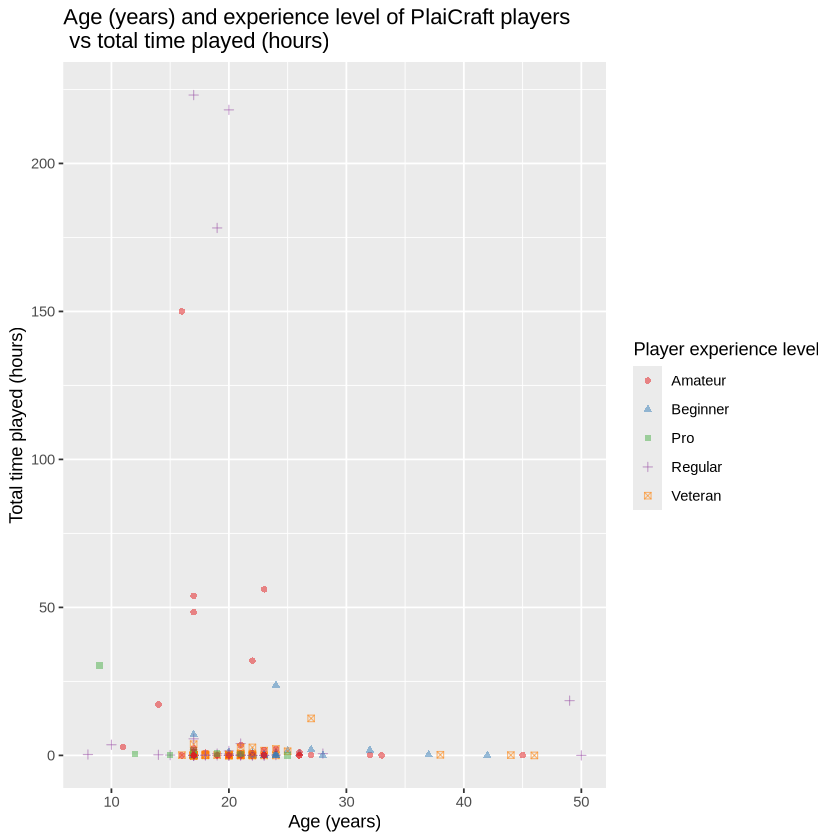

In [4]:
options(repr.height.plot = 8, repr.width.plot = 15)

players_scatter_plot <- players_tidy |> 
ggplot(aes(x = Age, y = played_hours, color = experience, shape = experience)) + 
geom_point(alpha = 0.5) + 
labs(title = "Age (years) and experience level of PlaiCraft players \n vs total time played (hours)", x = "Age (years)", y = "Total time played (hours)", color = "Player experience level", shape = "Player experience level") + 
scale_color_brewer(palette = "Set1")
theme(text = element_text(size = 12))

players_scatter_plot

Due to outliers at the extremities of the x- and y-axis, it’s difficult to take value insights from the graph. Instead, we can split the graph into two bar graphs to better display the relationship between each predictor and response variable.

In [5]:
avg_played_hours_experience <- players_tidy |> 
                                group_by(experience) |> 
                                summarize(avg_hours = mean(played_hours))
avg_played_hours_experience

experience,avg_hours
<fct>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.7846154
Regular,18.7257143
Veteran,0.6479167


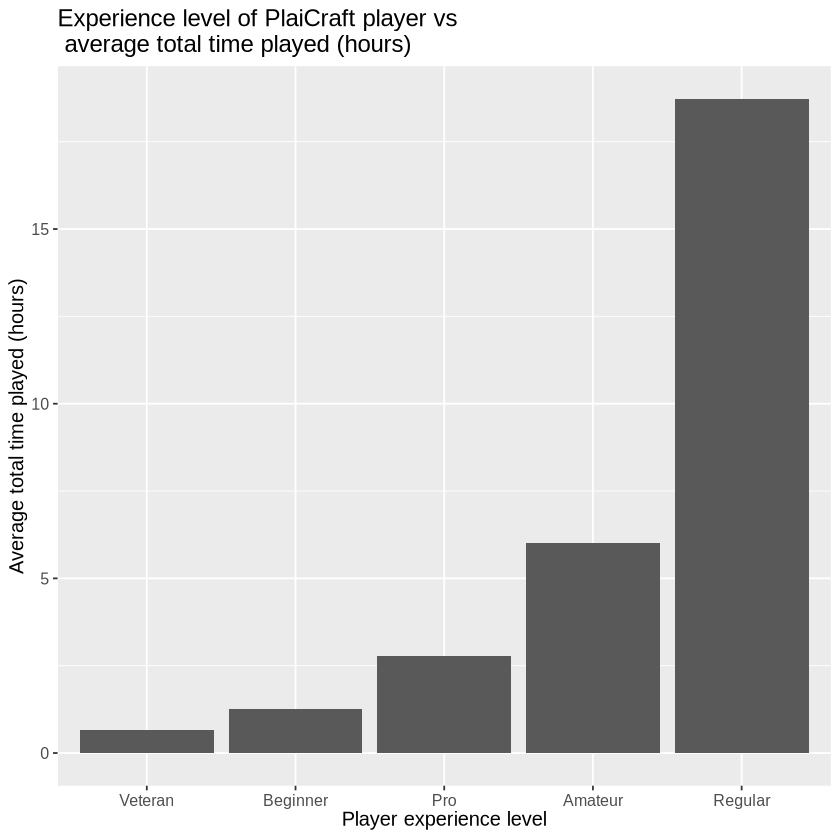

In [6]:
options(repr.height.plot = 8, repr.width.plot = 15)

experience_bar_plot <- avg_played_hours_experience |> 
ggplot(aes(x = fct_reorder(experience, avg_hours, .desc = FALSE), y = avg_hours)) + 
geom_bar(stat = "identity") + 
labs(x = "Player experience level", 
     y = "Average total time played (hours)",
     title = "Experience level of PlaiCraft player vs \n average total time played (hours)") + 
theme(text = element_text(size = 12))

experience_bar_plot

This bar plot shows Veteran has the lowest average played time, followed by Beginner, Pro, Amateur, and Regular.

In [7]:
avg_played_hours_age <- players_tidy |> 
                        group_by(Age) |> 
                        summarize(avg_hours = mean(played_hours))
avg_played_hours_age

Age,avg_hours
<dbl>,<dbl>
8,0.3
9,30.3
10,3.6
⋮,⋮
46,0.0
49,18.5
50,0.0


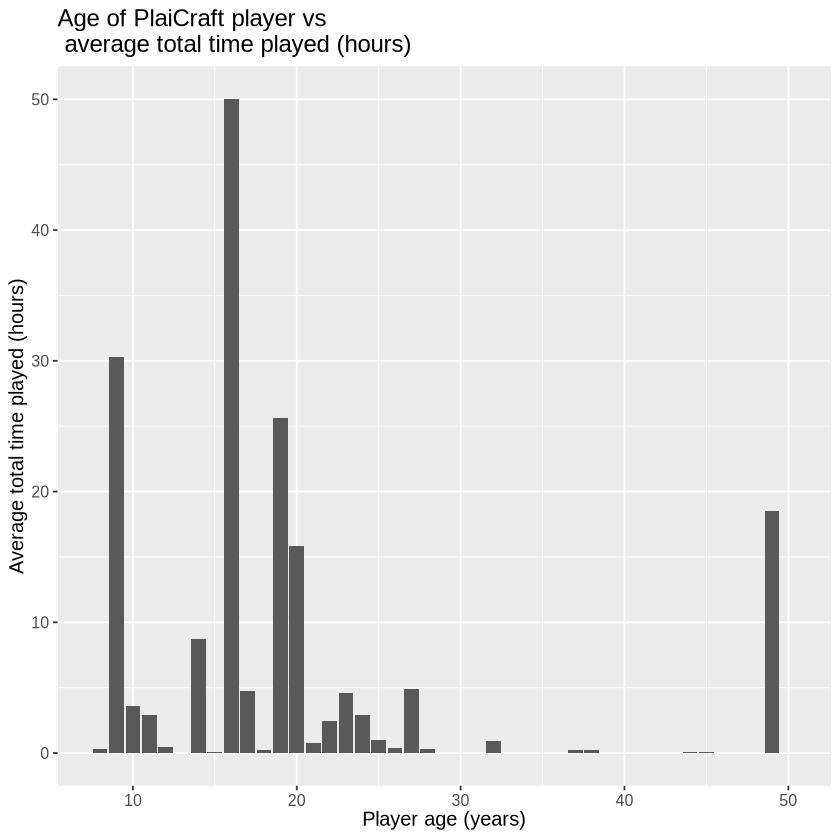

In [8]:
options(repr.height.plot = 8, repr.width.plot = 15)

age_bar_plot <- avg_played_hours_age |> 
ggplot(aes(x = Age, y = avg_hours)) + 
geom_bar(stat = "identity") + 
labs(x = "Player age (years)", 
     y = "Average total time played (hours)", 
     title = "Age of PlaiCraft player vs \n average total time played (hours)") + 
theme(text = element_text(size = 12))

age_bar_plot

There’s a non-linear, concave down curvature trend to the player age and their average total play time with the peak of the curve at approximately age 16.

In [9]:
exp_rows <- players_tidy |> 
group_by(experience)|> 
summarize(row = n())
exp_rows

experience,row
<fct>,<int>
Amateur,63
Beginner,35
Pro,13
Regular,35
Veteran,48


- The Amateur group has the largest number of players (63), suggesting that many players identify as amateurs rather than beginners or professionals.
- The Veteran group has the second-largest representation (48), indicating that a significant number of players have extensive experience.
- Beginner (35) and Regular (35) players are evenly distributed, suggesting that many players remain at a casual or intermediate level.
- The Pro category has the fewest players (13), indicating that fewer players self-identify at the highest skill level, possibly due to the commitment required to reach that level.

In [10]:
age_rows <- players_tidy |> 
group_by(Age) |> 
summarize(row = n()) |> 
arrange(row)
age_rows

Age,row
<dbl>,<int>
8,1
9,1
10,1
⋮,⋮
22,15
21,18
17,75


- The most common age is 17, with 75 players, reinforcing the earlier finding that this age group tends to have the highest average playtime.
- There is a gradual increase in player count from childhood to teenage years, peaking at 17, and then a gradual decline. This suggests that engagement in gaming is highest around late adolescence.
- Fewer players are seen at very young ages (8, 9, 10, etc.), which could be due to gaming restrictions, lack of access, or less-developed interest at that stage.
- The distribution of players across older ages (e.g., 21 and 22) remains moderate but is lower than at age 17, aligning with the trend that gaming engagement declines slightly in adulthood.


# Methods and Plan
To address the research question:
> **Can the experience and age of players accurately predict their total playtime using multivariate KNN and multivariate linear regression?**

I will use KNN regression and linear regression with experience and age as predictors to estimate played_hours. This approach assumes that both experience level and age influence total playtime and can be used to predict it. Since I am working with numerical values, regression allows us to make direct predictions for played_hours and compare the effectiveness of different models.

## Why these methods are appropriate?
- *KNN Regression*: KNN works by finding the closest data points (neighbors) to a given input and averaging their playtime to make a prediction. Since the age vs. playtime graph shows a curved trend, KNN is useful because it does not assume a straight-line relationship. It can adapt to patterns in the data, making it a good choice for capturing non-linear relationships between experience, age, and played_hours.
- *Linear regression*: Linear regression tries to fit a straight line that best represents the relationship between experience, age, and played_hours. Even though the age vs. playtime graph suggests a curved trend, linear regression is still useful as a simple and interpretable baseline model. It helps determine whether a straight-line approach is reasonable or if a more flexible method like KNN is needed.

By using both methods, I can determine which is better suited for predicting playtime based on model evaluation metrics.

## Assumptions required:
### KNN regression assumptions:
- Assumes closer data points have similar response values.
- Requires feature scaling and centering to ensure fair distance measurement between points.
### Linear regression assumptions:
- Assumes a straight-line relationship between predictors and response (the concave trend in age suggests this assumption may be violated).
- Observations should not be correlated.
- Experience and age should not be highly correlated.

## Potential limitations:
### KNN regression limitations:
- Small values of K can lead to overfitting, while large values can lead to underfitting.
- KNN performs poorly when predicting outside the training range (e.g., ages above 50, where data is sparse).
### Linear regression limitations:
- Cannot model non-linear relationships well, which is a concern given the curved trend in age vs. playtime.
- Sensitive to outliers, which can disproportionately affect predictions.

## How will models be compared?
To determine which model is more effective, I will compare them using:
- RMSPE on the test set (lower RMSPE is better).
- Cross-validation performance to ensure the model generalizes well to unseen data.

## Data processing plan:
1. Splitting the data:
    - 75% training, 25% testing
    - Training set used to build models, testing set used to evaluate performance.
2. Preprocessing steps:
    - Scale and center predictors for KNN regression to ensure proper distance calculations.
3. KNN Regression specifics:
    - Tune K between 1 to 75 (step size = 5) since some age groups (e.g., 17) have over 75 points.
    - Perform 5-fold cross-validation to select the best K.
4. Model evaluation:
    - Use test set RMSPE for both models to compare the accuracy.
    - Check residual plots for linearity assumptions in regression.